<a href="https://colab.research.google.com/github/LVaditya/Car_price_project/blob/main/Carprice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("cars_price.csv")

In [3]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
cols=df.columns       #column names are saved for using it later

In [ ]:
df.info()         #this will give the datatype of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#from the header we know there are values that are given as '?',replace them to null values to get actual number of null values
df.replace('?',np.NaN, inplace= True)

In [ ]:
df.isnull().sum() #we can see there are null values in many features.

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Very high number of null values in feature 'normalized-losses'. We can fill them with median value.for others since only few values we can drop rows with null values.

In [6]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median())

In [7]:
df.dropna(axis =0, inplace = True )

In [8]:
for each in cols:                                                       #taking value count of each feature
  print(each, df[each].value_counts())       #'make' has many unique values. enoding it to numerical values will increase the complexity

symboling  0    63
 1    51
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64
normalized-losses 115.0    34
161      11
91        8
134       6
128       6
104       6
85        5
94        5
65        5
102       5
74        5
168       5
103       5
95        5
93        4
106       4
118       4
122       4
125       3
83        3
150       3
154       3
148       3
115       3
101       3
137       3
158       2
145       2
87        2
89        2
197       2
81        2
119       2
113       2
194       2
108       2
129       2
188       2
110       2
164       2
153       2
192       2
90        1
256       1
78        1
121       1
77        1
98        1
186       1
142       1
107       1
231       1
Name: normalized-losses, dtype: int64
make toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
m

Splitting data into feature matrix and target. In data we can see there are values that are object type. We can keep all the numerical values but need to handle categorical features.

In [9]:
y = df['price']

In [10]:
X = df.drop('price', axis = 1)

<Axes: xlabel='num-of-cylinders', ylabel='count'>

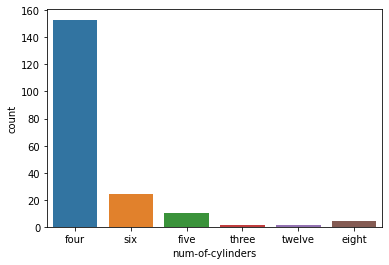

In [11]:
sns.countplot(x='num-of-cylinders',data=df)         #we can see the feature is distributed in an imbalanced manner. There is a possibility
                                                    #of not having certain values in test data.

Text(0.5, 1.0, 'price  vs  body-style')

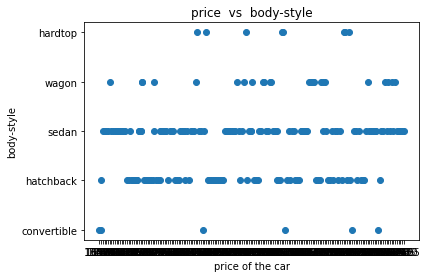

In [19]:
plt.scatter(df['price'],df['body-style'])       #visualizing how body-style affects price
plt.xlabel('price of the car')
plt.ylabel('body-style')
plt.title('price  vs  body-style')

Splitting data into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state = 0)

In [ ]:
y_train

137    11694
8      23875
171     7975
135    10198
131     9960
       ...  
103    16900
67      5389
117    32528
47      6095
172     7995
Name: price, Length: 154, dtype: object

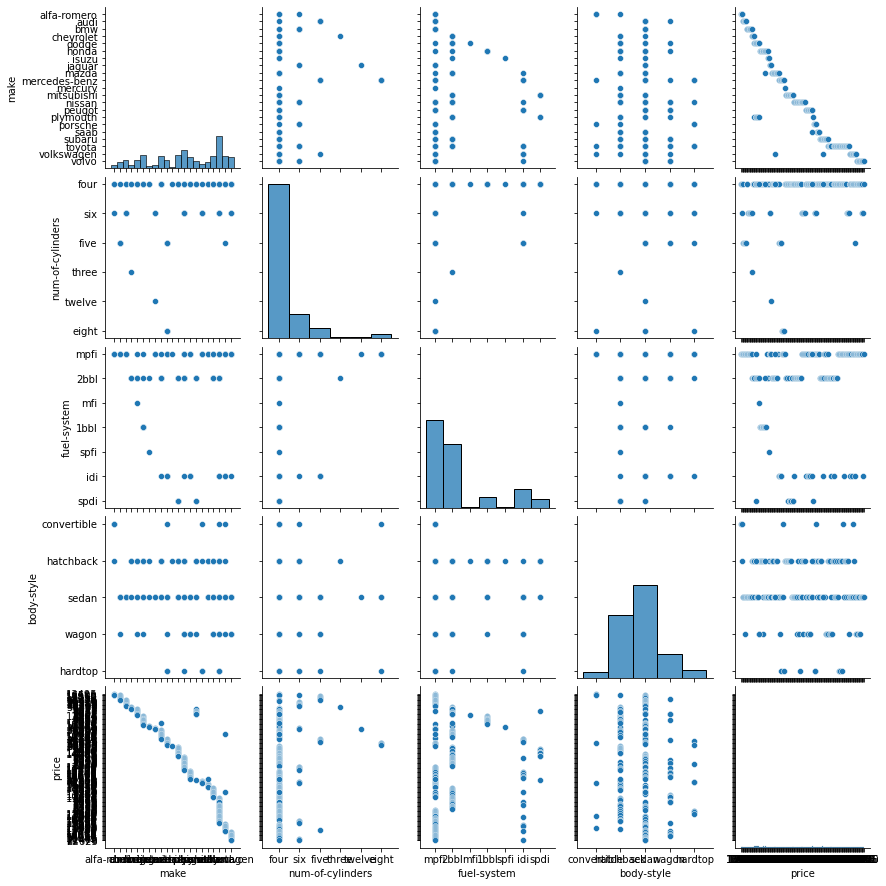

In [31]:
sns.pairplot(df,
             x_vars=['make','num-of-cylinders','fuel-system', 'body-style','price'],
             y_vars=['make','num-of-cylinders','fuel-system', 'body-style','price']
             )
plt.grid()
plt.show()

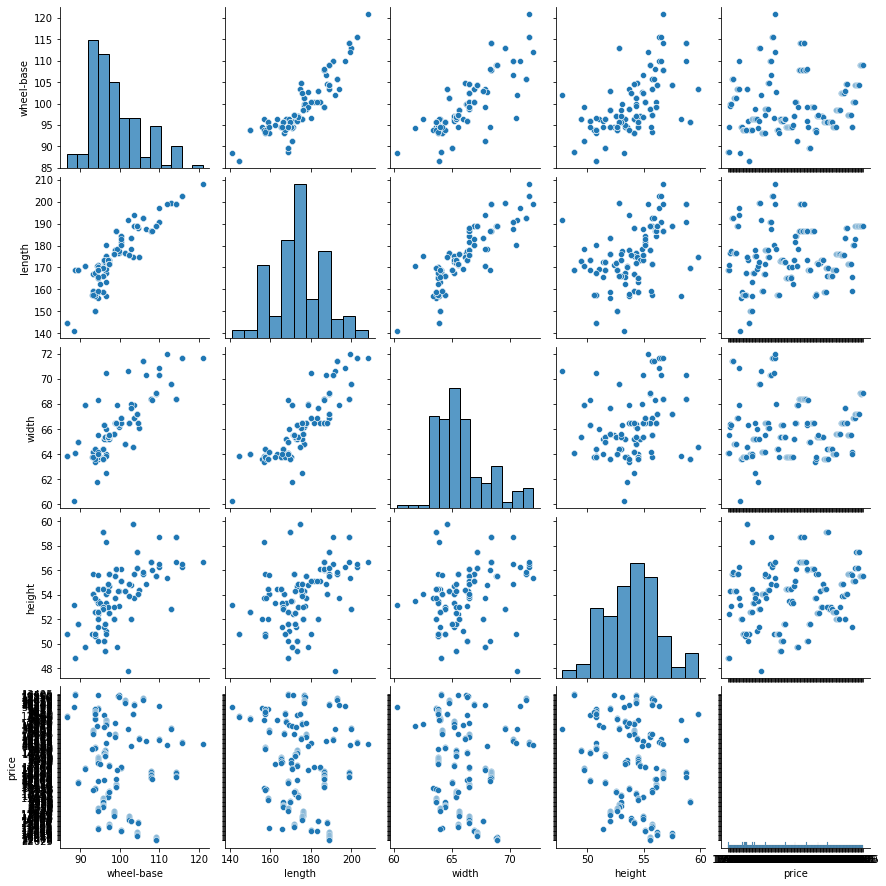

In [26]:
sns.pairplot(df,
             x_vars=[ 'wheel-base', 'length', 'width', 'height','price'],
             y_vars=['wheel-base', 'length', 'width', 'height','price']
             )
plt.grid()                                        #realation of the features is shown. 
plt.show()                                        #these features should be considered for modelling the data

converting categorical features into numerical.

In [34]:
cols


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [35]:
#considering features that have categorical features to be encoded
cols_to_dummy=['fuel-type','aspiration','num-of-doors', 'drive-wheels','engine-location','engine-type']

In [36]:
X_train=pd.get_dummies(X_train, columns=cols_to_dummy)

In [37]:
#droping features with large number of unique values and can cause increase in complexity of model
X_train = X_train.drop(['make','num-of-cylinders','fuel-system', 'body-style'], axis = 1)

In [ ]:
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv
149,0,85,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,...,1,0,0,1,0,0,0,0,1,0
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,...,0,1,0,1,0,0,0,1,0,0
183,2,122,97.3,171.7,65.5,55.7,2209,109,3.19,3.4,...,0,1,0,1,0,0,0,1,0,0
147,0,89,97.0,173.5,65.4,53.0,2455,108,3.62,2.64,...,0,1,0,1,0,0,0,0,1,0
143,0,102,97.2,172.0,65.4,52.5,2340,108,3.62,2.64,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,161,107.9,186.7,68.4,56.7,3252,152,3.7,3.52,...,0,0,1,1,0,0,1,0,0,0
76,2,161,93.7,157.3,64.4,50.8,1918,92,2.97,3.23,...,0,1,0,1,0,0,0,1,0,0
126,3,115.0,89.5,168.9,65.0,51.6,2756,194,3.74,2.9,...,0,0,1,0,1,0,0,0,1,0
51,1,104,93.1,159.1,64.2,54.1,1900,91,3.03,3.15,...,0,1,0,1,0,0,0,1,0,0


In [38]:
X_test=pd.get_dummies(X_test, columns=cols_to_dummy)

In [39]:
X_test = X_test.drop(['make','num-of-cylinders','fuel-system', 'body-style'], axis = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 149 to 184
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              154 non-null    int64  
 1   normalized-losses      154 non-null    object 
 2   wheel-base             154 non-null    float64
 3   length                 154 non-null    float64
 4   width                  154 non-null    float64
 5   height                 154 non-null    float64
 6   curb-weight            154 non-null    int64  
 7   engine-size            154 non-null    int64  
 8   bore                   154 non-null    object 
 9   stroke                 154 non-null    object 
 10  compression-ratio      154 non-null    float64
 11  horsepower             154 non-null    object 
 12  peak-rpm               154 non-null    object 
 13  city-mpg               154 non-null    int64  
 14  highway-mpg            154 non-null    int64  
 15  fuel

We have to convert the datatype of  features that had null values from object to float

In [40]:
X_train['normalized-losses']=X_train['normalized-losses'].astype(float)
X_train['bore']=X_train['bore'].astype(float)
X_train['stroke']=X_train['stroke'].astype(float)
X_train['horsepower']=X_train['horsepower'].astype(float)
X_train['peak-rpm']=X_train['peak-rpm'].astype(int)

In [41]:
X_test['normalized-losses']=X_test['normalized-losses'].astype(float)
X_test['bore']=X_test['bore'].astype(float)
X_test['stroke']=X_test['stroke'].astype(float)
X_test['horsepower']=X_test['horsepower'].astype(float)
X_test['peak-rpm']=X_test['peak-rpm'].astype(int)

We have a data with no missing values and categorical features. We can continue with the other preprocessing technique.

BoxPlot

In [ ]:
col_af_drop= X_train.columns      #Column names after dropping features as well as encoding categorical features


<Axes: >

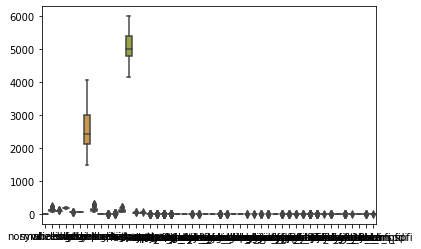

In [ ]:
#to compare the distribution of each feature we can plot a boxplot and see if scaling or other preprocessing techniques are required

sns.boxplot(data=X_train)                     # from boxplot it is clear that scaling is required

In [42]:
X_train.var()

symboling                     1.597997
normalized-losses           976.161149
wheel-base                   41.180659
length                      168.042132
width                         4.707687
height                        5.580759
curb-weight              286987.861175
engine-size                1640.946651
bore                          0.077048
stroke                        0.101080
compression-ratio            18.280131
horsepower                 1328.731390
peak-rpm                 204337.068161
city-mpg                     42.826628
highway-mpg                  49.757109
fuel-type_diesel              0.103896
fuel-type_gas                 0.103896
aspiration_std                0.161828
aspiration_turbo              0.161828
num-of-doors_four             0.244461
num-of-doors_two              0.244461
drive-wheels_4wd              0.043672
drive-wheels_fwd              0.245522
drive-wheels_rwd              0.236313
engine-location_front         0.012902
engine-location_rear     

In [46]:
from sklearn.feature_selection import VarianceThreshold     #for feature selection we can use variance method. 
VT= VarianceThreshold(threshold=1)                          #Selecting only features with variance above 3
X_var=VT.fit_transform(X_train)

In [47]:
VT.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [48]:
X_var_test=VT.transform(X_test)                                 #Applying variance threshold to test data

In [49]:
#Applying scaling to the data
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()

In [51]:
X_std = ss.fit_transform(X_var)
X_std_test = ss.transform(X_var_test)

<Axes: >

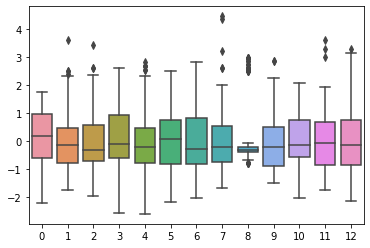

In [52]:
sns.boxplot(data=X_std)           #now the data is scaled and we can start modelling our algorithm

In [53]:
X_new = X_std
X_new_test = X_std_test

#Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr=LinearRegression()

In [56]:
lr.fit(X_new,y_train)

LinearRegression()

In [57]:
lr.score(X_new,y_train)

0.8400255379081034

In [58]:
lr.score(X_new_test,y_test)

0.8587550033250411

In [59]:
lr.coef_

array([-101.68935808,  -17.94796689, -374.14472838, -718.68274585,
       1589.42743582,  947.55439259,  643.79288434, 5050.41070408,
        839.40549908, 1735.25451094,  886.33629132, -802.77963911,
       1057.37850679])

In [60]:
lr.intercept_

13438.116883116876

In [61]:
y_pred = lr.predict(X_new_test)


In [62]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
metrics.mean_absolute_error(y_test,y_pred)

1968.7586881394168

In [64]:
metrics.mean_squared_error(y_test,y_pred)

8129305.796456468

In [65]:
metrics.r2_score(y_test,y_pred)

0.8587550033250411

Linear Regression gives a model with an accuracy of 85%

#SGD Regressor


In [66]:
from sklearn.linear_model import SGDRegressor

In [77]:
sgd = SGDRegressor()
sgd.fit(X_std,y_train)

SGDRegressor()

In [78]:
sgd.score(X_std,y_train)

0.8386752405523631

In [79]:
sgd.score(X_std_test,y_test)

0.8574066469563938

In [70]:
y_pred = sgd.predict(X_std_test)

In [71]:
metrics.r2_score(y_test, y_pred)

0.8583506236940738

SGD Regressor gives a score of 85.8%

#Ridge Regressor

In [82]:
from sklearn.linear_model import Ridge

In [83]:
lambda_values=[0.001,0.01,0.1,0.2,0.3,0.5]
rd_train_score=[]
rd_test_score=[]
rd_r2_score=[]
rd_MSE=[]


In [84]:
for k in lambda_values:
  rd = Ridge(alpha = k)
  rd.fit(X_new, y_train)
  y_pred_rd= rd.predict(X_new_test)
  rd_train_score.append(rd.score(X_new,y_train))
  rd_test_score.append(rd.score(X_new_test,y_test))
  rd_r2_score.append(metrics.r2_score(y_test, y_pred_rd))
  rd_MSE.append(metrics.mean_squared_error(y_test, y_pred_rd))

In [86]:
print(rd_test_score)
print(rd_train_score)
print(rd_r2_score)
print(rd_MSE)

[0.8587559607974206, 0.8587646120194548, 0.8588543507418367, 0.8589603950172027, 0.8590723418384865, 0.8593112014982222]
[0.8400255377481954, 0.8400255219684036, 0.8400239928900006, 0.8400195585745165, 0.8400125008033282, 0.8399913865416018]
[0.8587559607974206, 0.8587646120194548, 0.8588543507418367, 0.8589603950172027, 0.8590723418384865, 0.8593112014982222]
[8129250.689472524, 8128752.771450049, 8123587.891042249, 8117484.550303054, 8111041.490622492, 8097294.007439797]


The best score with Ridge regressor obtained is 0.859 with alpha value=0.5

#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
train_score=[]
test_score=[]

In [ ]:
max_depths = np.arange(1,16)
for n in max_depths:
  dtc= DecisionTreeRegressor(max_depth=n)
  dtc.fit(X_std, y_train)
  train_score.append(dtc.score(X_std, y_train))
  test_score.append(dtc.score(X_std_test, y_test))

print(train_score)
print(test_score)


[0.6494994071195079, 0.8764567126461323, 0.9201435831480544, 0.9529207206933925, 0.9738779322267949, 0.9865273159583328, 0.992331338825514, 0.9964314113475009, 0.9978467505739779, 0.9983358969732501, 0.9991294136592065, 0.9991562480005024, 0.9991581421932972, 0.9991581421932972, 0.9991581421932972]
[0.7278414668975559, 0.8923188163268675, 0.889412805961936, 0.8518772007236506, 0.8687955275600655, 0.902162823189013, 0.8506496235917895, 0.8366473442076566, 0.9016799025315774, 0.8883825972624421, 0.9139450378803343, 0.8571096506533371, 0.8883300449303327, 0.9102741580877703, 0.8710041777504173]


We get a model with good score and without overfitting at **max_depth = 2**. But score is **0.89**

#Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1,0.15,0.2]}

In [ ]:
gscv = GridSearchCV(GradientBoostingRegressor(),param_grid, cv=5)
#applying Grid Search CV to get parameters

In [ ]:
gscv.fit(X_std,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [ ]:
gscv.best_score_

0.8992759272854045

Based on result from Gridsearch CV tuning hyperparameter for Gradient Boosting Regressor to obtain better result

In [ ]:
test_score=[]
train_score=[]
gbc_r2_score=[]
MSE=[]

In [ ]:
learning_rate=[0.01,0.1,0.15]
for k in learning_rate:
  gbc = GradientBoostingRegressor(n_estimators=200, learning_rate=k)
  gbc.fit(X_std,y_train)
  y_pred = gbc.predict(X_std_test)
  test_score.append(gbc.score(X_std_test, y_test))
  train_score.append(gbc.score(X_std, y_train))
  gbc_r2_score.append(metrics.r2_score(y_test, y_pred))
  MSE.append(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(test_score)
print(train_score)
print(gbc_r2_score)
print(MSE)

[0.9400490481231971, 0.9415610889788862, 0.9469836565094957]
[0.9458896821779462, 0.9979675880362038, 0.9987886341241721]
[0.9400490481231971, 0.9415610889788862, 0.9469836565094957]
[3450455.8183870865, 3363430.8420552225, 3051336.8868993893]


The Gradient Boosting Regressor gives best result with parameters **n_estimators= 200** and **learning rate= 0.01**. The score obtained is **0.94**

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid_1={'n_estimators':[100,150,200,300],'max_depth':[1,2,3,4,5,6,7,8]}

In [ ]:
gscv_rf = GridSearchCV(RandomForestRegressor(), param_grid_1, cv=5)

In [ ]:
gscv_rf.fit(X_std,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 150, 200, 300]})

In [ ]:
gscv_rf.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [ ]:
gscv_rf.best_score_

0.898978587014055

Based on the result of GridSearch CV doing hyperparameter tuning to obtain better result

In [ ]:
rfc_test_score=[]
rfc_train_score=[]
rfc_r2_score=[]
rfc_MSE=[]

In [ ]:
max_depth=[2,3,4,6,7,8]
for k in max_depth:
  rfc = RandomForestRegressor(n_estimators=200, max_depth=k)
  rfc.fit(X_std,y_train)
  y_pred = rfc.predict(X_std_test)
  rfc_test_score.append(rfc.score(X_std_test, y_test))
  rfc_train_score.append(rfc.score(X_std, y_train))
  rfc_r2_score.append(metrics.r2_score(y_test, y_pred))
  rfc_MSE.append(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(rfc_test_score)
print(rfc_train_score)
print(rfc_r2_score)
print(rfc_MSE)

[0.9250928686279166, 0.9488656214334877, 0.9502498399570074, 0.9560230099111686, 0.9562842871312304, 0.9589637586354469]
[0.9007703155769186, 0.9399257407294593, 0.961815991097093, 0.9804706448892502, 0.984708940118365, 0.9868723280084083]
[0.9250928686279166, 0.9488656214334877, 0.9502498399570074, 0.9560230099111686, 0.9562842871312304, 0.9589637586354469]
[4311253.436186051, 2943021.0617339606, 2863352.854493272, 2531080.1009295247, 2516042.3829959263, 2361826.348846456]


Comparing the score values of different models the best result is obtained **Random Forest Regressor** with parameters n_estimators = 200 and max_depth = 3.
The score in this case is **0.948**

#Final Model

In [ ]:
rfc_1= RandomForestRegressor(n_estimators = 200, max_depth = 3)
rfc_1.fit(X_new, y_train)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [ ]:
y_pred_rf = rfc_1.predict(X_new_test)

In [ ]:
train_score=rfc_1.score(X_new, y_train)
test_score = rfc_1.score(X_new_test, y_test)
r2_score=metrics.r2_score(y_test, y_pred_rf)

print("train_score:",train_score)
print("test_score:",test_score)
print("r2_score:",r2_score)

train_score: 0.941236595717762
test_score: 0.9470822879557069
r2_score: 0.9470822879557069


The final model is Random Forest Regressor with max score of **0.947**